In [ ]:
# This code is taken from work of Kalilurrehman on Kaggle
# https://www.kaggle.com/kalilurrahman/nse-500-india-prediction-using-fb-prophet/notebook

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime as datetime
from math import sqrt

import yfinance as yf
 
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [29]:
def collect_data(Symbol, start_date):
    stock_data = yf.download(Symbol, start=start_date, end=datetime.now())#DataReader(Symbol, data_source='yahoo', start=start_date, end=datetime.now())
    return stock_data    

In [30]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

In [31]:
def fb_prophet_plot(df, param, stock):
    # Check the dataset
    #df.head()
    # Create Dataset based on the FB Prophet standard ds/y
    df2 = pd.DataFrame([], columns = ['ds', 'y'])
    df2.columns=['ds','y']
    df2['ds']=pd.to_datetime(df.index,format='%Y-%m')
    #Assign the Parameter
    df2['y']=df[param].values
    #check the new DS
    #df2.head()
    
    #create a new Prophet Model
    model=Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True)
    
    #Fit the Model
    model.fit(df2)
    #Predict the future
    future=model.make_future_dataframe(periods=10, freq='MS')
    forecast=model.predict(future)
    #Save the predicted model
    preds= forecast['yhat'][:-10]
    #plot the graph
    title = 'FB Prophet predictions for ==> ' + stock
    plt.figure(figsize=(16,8))
    plt.plot(df2.ds,preds,color='#555555',label=' Predictions')
    plt.plot(df2.ds,df2.y,color='#1155FF',label='Actual')
    plt.title(title)
    plt.legend()
    plt.show()
    figure=model.plot(forecast,xlabel='Date',ylabel='Price')
    figure.set_size_inches(16,8)
    plt.title(title)
    model.plot_components(forecast)
    plt.show()

Let us evaluate for all of NSE-500 stocks from 2019
[*********************100%***********************]  1 of 1 completed


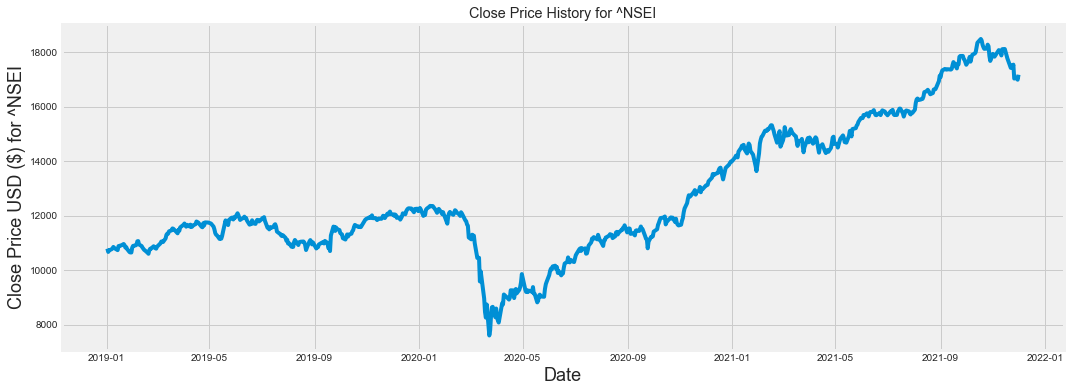

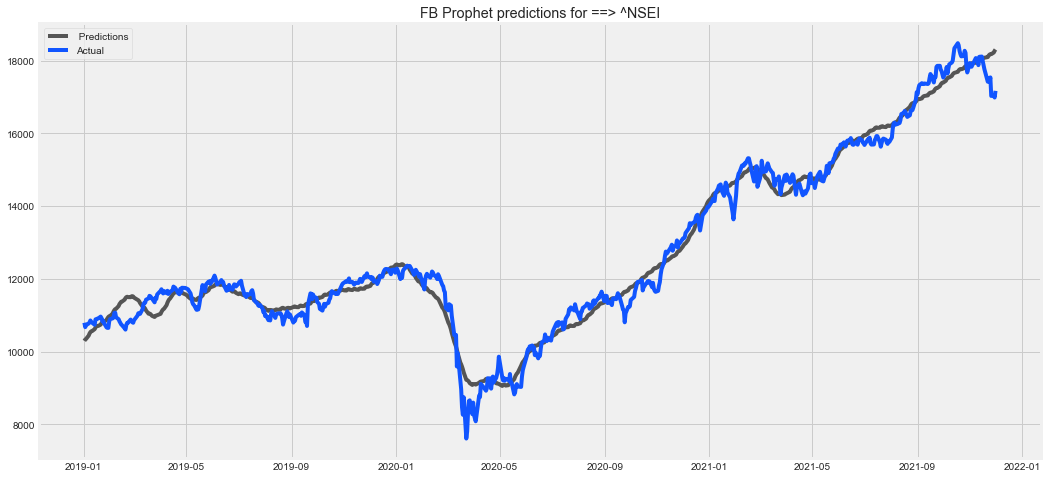

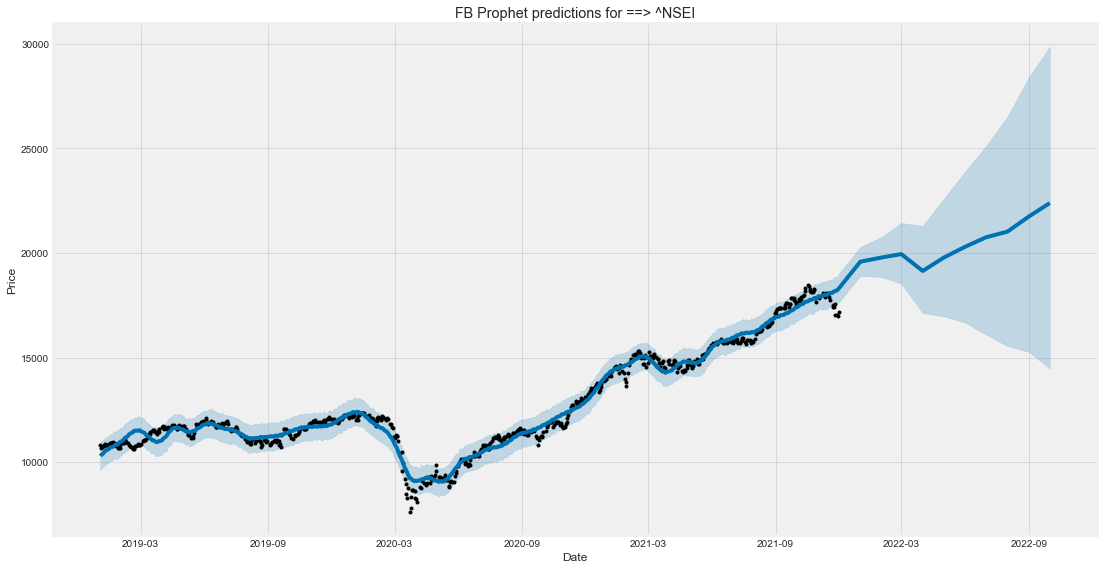

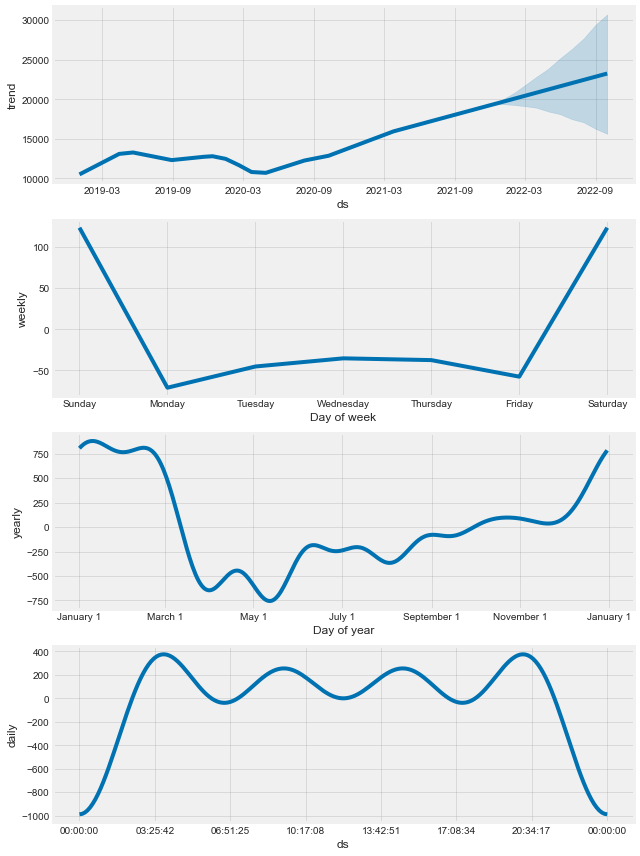

All forecasting done!


In [32]:
Symbols = ['^NSEI']  # ^NSEI
start='2019-01-01'
print("Let us evaluate for all of NSE-500 stocks from 2019")
for stock in Symbols:
    df = collect_data(stock,start) #Collect the data
    plot_close_val(df, 'Close', stock) # Plot the Closing Price
    fb_prophet_plot(df, 'Close', stock)

print("All forecasting done!")